In [1]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset("tips")
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# T-test

In [3]:
df1=dataset

In [4]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
pop_mean=np.mean(df1["tip"])
pop_mean

2.9982786885245902

In [13]:
pop_len=len(df1)
pop_len

244

In [23]:
tip_sample=df1["tip"].sample(40)
tip_sample[:5]

37     3.07
201    2.01
63     3.76
233    1.47
60     3.21
Name: tip, dtype: float64

In [25]:
from scipy.stats import ttest_1samp

In [26]:
ttest,p_value=ttest_1samp(tip_sample,pop_mean)

In [27]:
ttest

-0.715476752943116

In [29]:
p_value

0.478576358078559

In [30]:
if p_value<0.05:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

Accept Null Hypothesis


In [33]:
import scipy.stats as stats
import math

In [34]:
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [38]:
school_ages

array([65, 42, 51, ..., 46, 53, 49])

(array([ 17.,  57., 197., 258., 399., 262., 200.,  63.,  40.,   7.]),
 array([37. , 40.5, 44. , 47.5, 51. , 54.5, 58. , 61.5, 65. , 68.5, 72. ]),
 <a list of 10 Patch objects>)

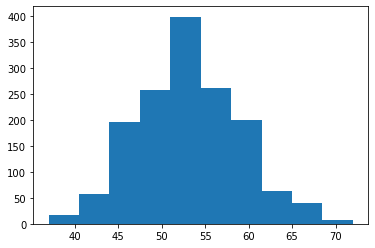

In [48]:
plt.hist(school_ages)

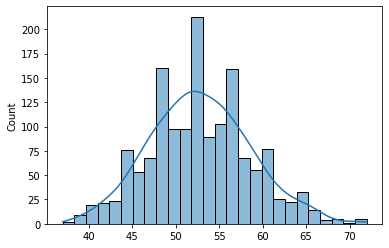

In [50]:
sn.histplot(school_ages,kde=True)

In [37]:
classA_ages

array([51, 52, 61, 52, 54, 38, 39, 38, 49, 46, 51, 45, 51, 50, 57, 52, 48,
       49, 42, 49, 42, 47, 49, 48, 48, 49, 50, 44, 45, 41, 49, 42, 46, 42,
       58, 50, 53, 55, 41, 48, 50, 60, 42, 52, 50, 45, 49, 44, 44, 47, 44,
       51, 54, 50, 41, 50, 51, 43, 45, 42])

In [55]:
school_ages.mean()

52.839333333333336

In [58]:
test,p_value=stats.ttest_1samp(classA_ages,school_ages.mean())

In [59]:
p_value

5.478332281485186e-10

In [61]:
if p_value<0.05:
    print("Reject Null Hypothesis,there is difference in the age")
else:
    print("Accept Null Hypothesis")

Reject Null Hypothesis,there is difference in the age


Two Sample T-test

In [64]:
np.random.seed(12)
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
classB_ages.mean()

50.63333333333333

In [66]:
_,p_value=stats.ttest_ind(classA_ages,b=classB_ages,equal_var=False)

In [67]:
p_value

0.008982177052154256

# Co-relation

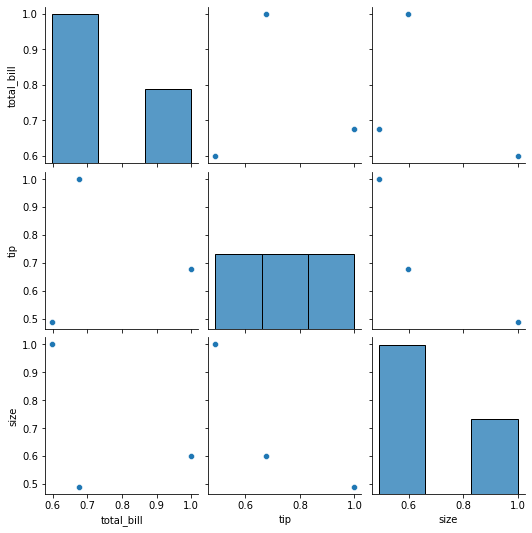

In [70]:
sn.pairplot(df1.corr())

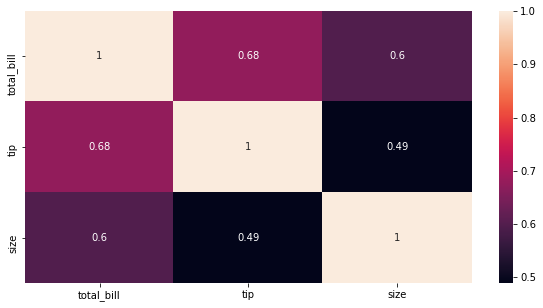

In [74]:
plt.figure(figsize=(10,5))
sn.heatmap(df1.corr(),annot=True)

# Chi-square Test

In [4]:
dataset_table=pd.crosstab(dataset["sex"],dataset["smoker"])
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [6]:
Observed_Values=dataset_table.values
print("Observed Values:-\n ",Observed_Values)

Observed Values:-
  [[60 97]
 [33 54]]


In [9]:
val=stats.chi2_contingency(dataset_table)

In [10]:
val

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [11]:
Expected_Values=val[3]

In [12]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:- ",ddof)
alpha=0.05

Degree of Freedom:-  1


In [13]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [14]:
print(chi_square_statistic)

0.001934818536627623


In [15]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print(critical_value)

3.841458820694124


In [17]:
p_value=chi2.cdf(x=chi_square_statistic,df=ddof)
print("P-value: ",p_value)
print("significance level: ",alpha)
print("Degree of Freedom: ",ddof)
print("P-value: ",p_value)


P-value:  0.03508489268426801
significance level:  0.05
Degree of Freedom:  1
P-value:  0.03508489268426801


In [18]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is relationship between two categorical values")
else:
    print("Retain H0,There is no relationship between two categorical values")
if p_value<=alpha:
    print("Reject H0,There is relationship between two categorical values")
else:
    print("Retain H0,There is no relationship between two categorical values")

Retain H0,There is no relationship between two categorical values
Reject H0,There is relationship between two categorical values


# Anova Test

In [1]:
from scipy.stats import f_oneway

In [4]:
df1=dataset

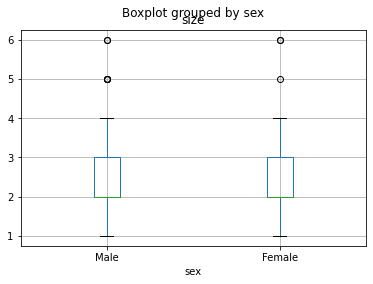

In [18]:
df1.boxplot("size",by="sex")

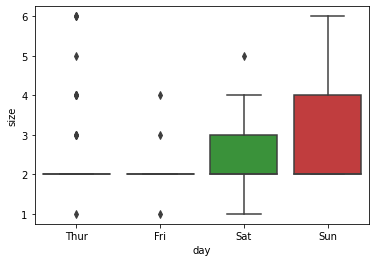

In [26]:
sn.boxplot(x="day",y="size",data=df1)

In [32]:
grps=pd.unique(df1.day.values)
grps

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

In [41]:
d_data={grp:df1["size"][df1.day==grp] for grp in grps}
k=len(pd.unique(df1.day))
N=len(df1.values)
n=df1.groupby("size").size()


In [42]:
from scipy import stats
f,p=stats.f_oneway(d_data["Thur"],d_data["Fri"],d_data["Sat"],d_data["Sun"])

In [43]:
p

0.006840567173057235

In [44]:
f

4.150516390595168

# Z-test

In [16]:
from scipy import stats
import math

In [6]:
abc=stats

In [9]:
df1=dataset

In [10]:
sample=df1.sample(50)

In [13]:
p_mean=df1["tip"].mean()
s_mean=sample["tip"].mean()
std_pop=df1["tip"].std()

In [19]:
z_score=(s_mean-p_mean)/(std_pop/math.sqrt(len(sample)))

In [20]:
z_score

1.7443188242872523

In [24]:
z=stats.zscore(df1["tip"])

In [30]:
len(df1)

244

In [33]:
s1=df1["tip"].sample(50)
s2=df1["total_bill"].sample(70)

In [34]:
p1_mean=df1["tip"].mean()
p2_mean=df1["total_bill"].mean()
df_p=p1_mean-p2_mean
s1_mean=s1.mean()
s2_mean=s2.mean()
df_s=s1_mean-s2_mean
std1=s1.std()
std2=s2.std()

In [39]:
def TwoSampZ(x1,x2,std1,std2,N1,N2):
    from numpy import sqrt,abs,round
    from scipy.stats import norm
    ovr_std=sqrt(std1**2/N1 + std2**2/N2)
    z=(x1-x2)/ovr_std
    pval=2*(1-norm.cdf(abs(z)))
    return (f"z-score:{z},p-value:{pval}")

In [40]:
TwoSampZ(df_s,df_p,std1,std2,len(s1),len(s2))

'z-score:0.9718053306512623,p-value:0.3311474034339854'